In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
data = pd.read_csv("ds1_train.csv")

In [28]:
data.head(5)

,x_1,x_2,y
0,0.411809,1.105525,0.0
1,1.274746,6.303314,0.0
2,0.115488,3.264251,0.0
3,-0.486306,0.279487,0.0
4,0.257625,1.212389,0.0


In [29]:
x = np.hstack([np.ones((data.shape[0], 1)), data[["x_1","x_2"]].values])

In [30]:
x.shape

(800, 3)

In [31]:
y = data["y"].values

In [32]:
y = y.astype(int)

In [33]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
y.shape

(800,)

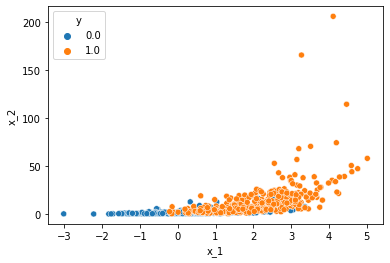

In [35]:
sns.scatterplot(x="x_1",y="x_2",hue="y",data=data)

In [36]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [37]:
def hess(theta,x,y):
    hess = np.zeros([x.shape[1], x.shape[1]])
    z = x.dot(theta)
    
    for i in range(hess.shape[0]):
        for j in range(hess.shape[0]):
            hess[i][j] = np.mean(sigmoid(z)*(1-sigmoid(z))*x[:,i]*x[:,j])
    return hess          

In [38]:
def grad_l(theta, x, y):
    z = x.dot(theta)
#     print(z.shape)
    g = -np.mean((y-sigmoid(z))*x.T, axis=1)
#     print(g.shape)
    return g

In [39]:
def newton(theta0, x, y, G, H, eps):
    theta = theta0
    delta = 1
    iteration = 0
    while delta > eps:
        theta_prev = theta.copy()
        theta -= np.linalg.inv(H(theta, x, y)).dot(G(theta, x, y))
        delta = np.linalg.norm(theta-theta_prev, ord=1)
        iteration = iteration + 1
        print(f"Iteration = {iteration} and delta = {delta}")
    return theta

In [40]:
theta0 = np.zeros([x.shape[1]])
theta_final = newton(theta0,x,y,grad_l,hess,1e-6)
print(theta_final)

Iteration = 1 and delta = 2.2379284389910667
Iteration = 2 and delta = 0.92489152853295
Iteration = 3 and delta = 0.5488144993429839
Iteration = 4 and delta = 0.3175255075711273
Iteration = 5 and delta = 0.08149859388979377
Iteration = 6 and delta = 0.004339222408308474
Iteration = 7 and delta = 1.1965356969512175e-05
Iteration = 8 and delta = 9.348832819000563e-11
[-2.40859977  1.03437317  0.24480705]


In [41]:
data = data[["y","x_1","x_2"]]

In [42]:
data.tail(5)

,y,x_1,x_2
795,1.0,1.724697,5.181074
796,1.0,1.139055,1.332207
797,1.0,0.969095,4.518381
798,1.0,1.957531,6.082968
799,1.0,2.025334,2.729588


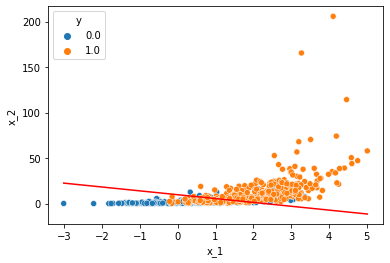

In [45]:
x1_vec = np.linspace(data["x_1"].min(),data["x_1"].max(),2)
sns.scatterplot(x="x_1", y="x_2", hue="y", data=data);

plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");


In [46]:
data = pd.read_csv("ds1_valid.csv")

In [47]:
data

,x_1,x_2,y
0,-0.322604,1.440160,0.0
1,1.452131,2.262743,0.0
2,0.851176,0.874618,0.0
3,-0.425066,0.494481,0.0
4,1.079775,4.152225,0.0
...,...,...,...
95,1.795618,2.612472,1.0
96,1.953480,1.633400,1.0
97,1.863524,5.889899,1.0
98,2.917294,22.776840,1.0


In [48]:
x = np.hstack([np.ones((data.shape[0], 1)), data[["x_1","x_2"]].values])

In [49]:
y = data["y"].values

In [50]:
y = y.astype(int)

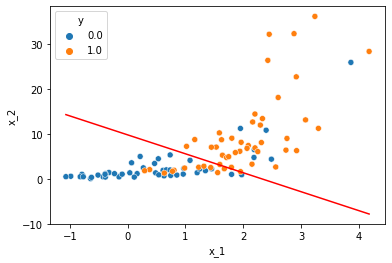

In [51]:
x1_vec = np.linspace(data["x_1"].min(),data["x_1"].max(),2)
sns.scatterplot(x="x_1", y="x_2", hue="y", data=data);

plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");
